In [434]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
# Ignore a specific warning
warnings.filterwarnings("ignore")
import random
import struct

## Data Collection and Processing

##### Reading the data from kaggle.com
https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

https://www.kaggle.com/datasets/balajisr/indian-mutual-funds-dataset-2023

https://www.kaggle.com/datasets/mukhazarahmad/22-years-of-us-treasury-bonds-data?select=Treasury+Yield+5+Years.csv

https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset


In [435]:
goldDf = pd.read_csv("./Data/GOLD.csv")                                  #Gold Data
bondsDf = pd.read_csv("./Data/BONDS.csv")                                #Bonds Data
stocksDf = pd.read_csv("./Data/Stocks.csv")                              #NASDAQ Data

In [436]:
#Removing columns which are not required
stocksDf.drop(["change_percent","avg_vol_20d"],inplace = True,axis = 1)
goldDf = goldDf[["Date","Open","High","Low","Close","Volume"]]  
stocksDf["Close"] = stocksDf["close"]
stocksDf.drop("close",inplace = True,axis = 1)

In [437]:
#Converting Date string column to Date time object using pandas
stocksDf["Date"] = pd.to_datetime(stocksDf["date"])
bondsDf["Date"] = pd.to_datetime(bondsDf["Date"])
goldDf["Date"] = pd.to_datetime(goldDf["Date"])

#### Visualization of the 3 assets

In [438]:
# Display the first few rows of each dataset
print("Gold DataFrame:")
print(goldDf.head())

print("\nBonds DataFrame:")
print(bondsDf.head())

print("\nStocks DataFrame:")
print(stocksDf.head())

# Data Cleaning
# - Handle missing values
goldDf.dropna(inplace=True)
bondsDf.dropna(inplace=True)
stocksDf.dropna(inplace=True)

Gold DataFrame:
        Date   Open   High    Low  Close  Volume
0 2000-01-04  289.5  289.5  280.0  283.7   21621
1 2000-01-05  283.7  285.0  281.0  282.1   25448
2 2000-01-06  281.6  282.8  280.2  282.4   19055
3 2000-01-07  282.5  284.5  282.0  282.9   11266
4 2000-01-10  282.4  283.9  281.8  282.7   30603

Bonds DataFrame:
        Date   High    Low   Open  Close  Adj Close
0 2001-01-02  4.940  4.745  4.940  4.752      4.752
1 2001-01-03  4.966  4.716  4.716  4.923      4.923
2 2001-01-04  4.908  4.808  4.908  4.808      4.808
3 2001-01-05  4.828  4.665  4.750  4.672      4.672
4 2001-01-08  4.714  4.586  4.707  4.601      4.601

Stocks DataFrame:
         date     open     high      low     volume    Close       Date
0  1985-09-25  111.175  111.175  111.175          0  111.175 1985-09-25
1  1985-09-26  110.640  110.640  110.640          0  110.640 1985-09-26
2  1985-09-27  110.640  110.640  110.640          0  110.640 1985-09-27
3  1985-09-30  110.620  110.620  110.620          0  

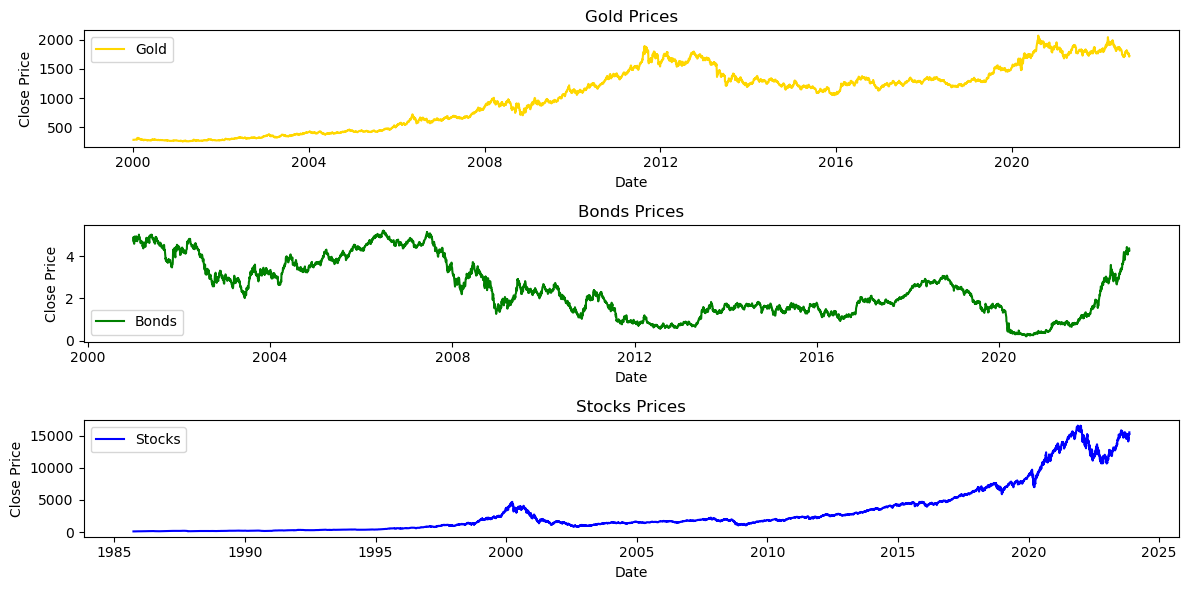

In [439]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(goldDf['Date'], goldDf['Close'], label='Gold', color='gold')
plt.title('Gold Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(bondsDf['Date'], bondsDf['Close'], label='Bonds', color='green')
plt.title('Bonds Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(stocksDf['Date'], stocksDf['Close'], label='Stocks', color='blue')
plt.title('Stocks Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.tight_layout()
plt.show()

##### We have data of Stocks, Gold and Bonds. Now we will calculate the volatality of all the assets for risk analysis

##### Reference :  https://corporatefinanceinstitute.com/resources/career-map/sell-side/capital-markets/volatility-vol/

The simplest approach to determine the volatility of a security is to calculate the standard deviation of its prices over a period of time.

In [440]:
#For better understanding, calculate volatality of last 3 years only
volatalityList = []
assetsList = [goldDf,bondsDf,stocksDf]
t = ["goldDf","bondsDf","stocksDf"]
for asset,n in zip(assetsList,t):
    assetList = asset["Close"].tolist()[-1000:]
    mean = np.mean(assetList)
    sqdiff = []
    for i in assetList:
        temp = i - mean
        sqdiff.append(temp**2)
    suma = np.sum(sqdiff)
    variance = suma/len(assetList)
    sd = variance**(1/2)
    volatalityList.append(sd)
    print(n,"--->",sd)

goldDf ---> 233.32236006829694
bondsDf ---> 1.0404986132955159
stocksDf ---> 2203.6513136074914


##### This 3 assets represent the high volatality, medium volatality and low volatality. 

##### Gold :  Standard Deviation: 233.32
The standard deviation of 233.32 indicates the historical volatility of returns for the gold dataset. It suggests that gold returns have experienced moderate volatility over the given time period.

#### Bonds : Standard Deviation: 1.04
The low standard deviation of 1.04 suggests that the returns on bonds have been relatively stable and less volatile compared to the other two datasets.

#### Stocks : Standard Deviation: 2203.65¶
The high standard deviation of 2203.65 indicates significant volatility in the returns of the stocks dataset. This level of volatility is quite substantial, and it suggests that the stock returns have experienced large fluctuations over the specified time period.


##### Now we will calculate the volatality for 55 more assets (etf and stock market).


In [441]:
# Get the list of all files and directories
path = "./Data/Stocks"
stocksList = os.listdir(path)
path = "./Data/ETF"
etfList = os.listdir(path)
finalList = stocksList+etfList


In [442]:
#STOCKS
volatalityDict = {}
for stock in stocksList:
    tempDf = pd.read_csv("./Data/Stocks/{}".format(stock))
    assetList = tempDf["Close"].tolist()[-1000:]
    mean = np.mean(assetList)
    sqdiff = []
    for i in assetList:
        temp = i - mean
        sqdiff.append(temp**2)
    suma = np.sum(sqdiff)
    variance = suma/len(assetList)
    sd = variance**(1/2)
    volatalityDict[stock.split(".")[0]] = sd

In [443]:
#ETF
for etf in etfList:
    tempDf = pd.read_csv("./Data/ETF/{}".format(etf))
    assetList = tempDf["Close"].tolist()[-1000:]
    mean = np.mean(assetList)
    sqdiff = []
    for i in assetList:
        temp = i - mean
        sqdiff.append(temp**2)
    suma = np.sum(sqdiff)
    variance = suma/len(assetList)
    sd = variance**(1/2)
    volatalityDict[etf.split(".")[0]] = sd
print("Volatality of all Stocks and ETF")
print()
print(volatalityDict)

Volatality of all Stocks and ETF

{'aa': 7.444748694207481, 'aep': 8.91210925807331, 'axp': 9.94200803332199, 'ba': 37.09396010801623, 'c': 7.882929727937451, 'cat': 16.031710157914876, 'cnp': 3.8512420754835706, 'cvx': 11.274274530581158, 'dis': 12.133882181379175, 'dte': 14.860666501988362, 'ed': 11.70151052900505, 'ge': 2.8318557754349003, 'gt': 3.845701432559605, 'hon': 16.958721522437944, 'hpq': 2.6994528319652558, 'ibm': 13.639824510469333, 'intc': 4.58930868206487, 'ip': 6.1983218027687945, 'jnj': 15.381032672943517, 'jpm': 14.209951421257957, 'ko': 3.193941582080674, 'mcd': 23.508032135522615, 'mmm': 27.166314561522693, 'mo': 12.79460796077332, 'mrk': 5.50119639002681, 'mro': 8.894318901980915, 'pg': 6.8405550787040665, 'utx': 9.324618119746836, 'wmt': 6.563369266734807, 'xom': 5.2666923934397385, 'dia': 22.330438390302596, 'eem': 3.974117977594022, 'efa': 4.054084984537941, 'ewj': 3.8579016251195415, 'ewz': 7.34716943514106, 'fxi': 4.480448026690969, 'ivv': 23.571845275879443,

In [444]:
dfDict = {}

In [445]:
for etf in etfList:
    tempDf = pd.read_csv("./Data/ETF/{}".format(etf))
    tempDf["Date"] = pd.to_datetime(tempDf["Date"])
    maskDf = (tempDf['Date'] > "2007-01-01") & (tempDf['Date'] <= "2017-01-01")
    tempDf = tempDf.loc[maskDf]
    tempDf.reset_index(inplace=True)
    tempDf.drop("index",axis = 1,inplace = True)
    dfDict[etf.split(".")[0]] = tempDf

In [446]:
for stock in stocksList:
    tempDf = pd.read_csv("./Data/Stocks/{}".format(stock))
    tempDf["Date"] = pd.to_datetime(tempDf["Date"])
    maskDf = (tempDf['Date'] > "2007-01-01") & (tempDf['Date'] <= "2017-01-01")
    tempDf = tempDf.loc[maskDf]
    tempDf.reset_index(inplace=True)
    tempDf.drop("index",axis = 1,inplace = True)
    dfDict[stock.split(".")[0]] = tempDf

In [447]:
dfDict["aa"]

,Date,Open,High,Low,Close,Volume,OpenInt
0,2007-01-03,62.745,62.7630,60.904,61.242,3870501,0
1,2007-01-04,61.242,61.3780,60.150,60.778,2686787,0
2,2007-01-05,60.778,61.0510,59.484,60.049,3452716,0
3,2007-01-08,60.278,60.5960,59.048,59.462,4920495,0
4,2007-01-09,59.924,60.2980,58.646,59.549,5800605,0
...,...,...,...,...,...,...,...
2513,2016-12-23,29.790,30.1300,29.340,29.710,2881790,0
2514,2016-12-27,29.580,30.0400,29.400,29.650,1708936,0
2515,2016-12-28,29.780,30.1700,29.350,29.430,2751053,0
2516,2016-12-29,29.430,29.4400,28.600,28.890,3224586,0


##### Checking if any null value exists

In [448]:
nullList = []
for df in list(dfDict.keys()):
    if(dfDict[df].isnull().sum().sum() != 0):
        nullList.append(df)
if(len(nullList) == 0):
    print("No Null Values in the Dataframes")
else:
    print("Null Values in ",nullList)

No Null Values in the Dataframes


In [449]:
#Calculating returns of all assets
returnDict = {}
for df in list(dfDict.keys()):
    returnsList = [0]
    for i in range(1,len(dfDict[df]["Close"])):
        returnsList.append(dfDict[df]['Close'][i] - dfDict[df]['Close'][i-1])
    dfDict[df]['Return'] =returnsList
    # dfDict["aa"]['Normed Return'] = dfDict["aa"]['Close']/ dfDict["aa"].iloc[0]['Close']
    returnDict[df] = dfDict[df]['Return'].sum()
    if(dfDict[df]['Return'].sum() < -100):
        returnDict[df] = 30
    # print(dfDict["aa"].head())
    # print(dfDict["aa"].tail())
print(returnDict)

{'dia': 87.24000000000001, 'eem': 0.9239999999999995, 'efa': -4.033999999999999, 'ewj': -3.2040000000000006, 'ewz': -5.824000000000005, 'fxi': 1.5, 'ivv': 98.57000000000001, 'iwm': 62.87100000000001, 'iyr': 10.361000000000004, 'mdy': 163.91, 'oih': -3.1879999999999953, 'qqq': 78.34400000000001, 'smh': 43.682, 'spy': 97.22999999999999, 'tlt': 42.84, 'vwo': 2.0889999999999986, 'xlb': 19.013, 'xle': 24.863, 'xlf': -3.677999999999999, 'xli': 30.74, 'xlk': 27.067, 'xlp': 28.763, 'xlu': 18.748, 'xlv': 38.282, 'xly': 45.806, 'aa': -33.162000000000006, 'aep': 28.154000000000003, 'axp': 18.190000000000005, 'ba': 76.29, 'c': 30, 'cat': 39.373000000000005, 'cnp': 10.979, 'cvx': 58.52700000000001, 'dis': 72.23400000000001, 'dte': 57.77400000000001, 'ed': 35.020999999999994, 'ge': 0.20800000000000196, 'gt': 8.640999999999995, 'hon': 75.298, 'hpq': -1.4129999999999985, 'ibm': 78.57, 'intc': 18.959, 'ip': 23.929999999999996, 'jnj': 58.941, 'jpm': 44.301, 'ko': 20.624999999999996, 'mcd': 83.8540000000

### K-Means Clustering

#### We will cluster them based on high risk, medium risk and low risk using k means clustering

Text(0.5, 1.0, 'Returns vs Volatality : 55 Assets')

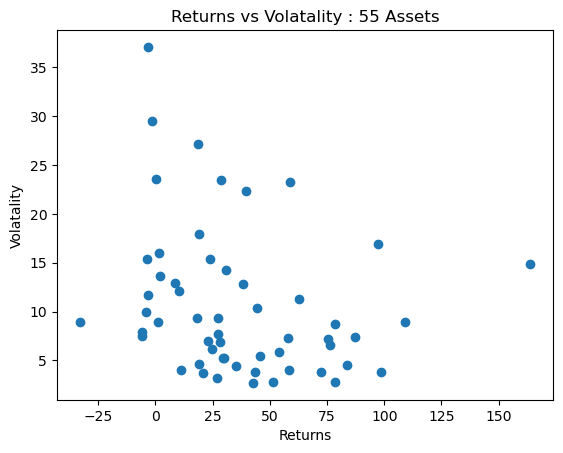

In [450]:
plt.scatter(returnDict.values(),volatalityDict.values())
plt.xlabel("Returns")
plt.ylabel("Volatality")
plt.title("Returns vs Volatality : 55 Assets")

In [451]:
def initializeCentroids():
    indexList = []
    k = 5
    for i in range(0,k):
        temp = random.randrange(1,55)
        if temp in indexList:
            k = k+1
            continue
        indexList.append(temp)
    return [k,indexList]

[50, 42, 29, 20, 48]


Text(0.5, 1.0, 'Returns vs Volatality : 55 Assets')

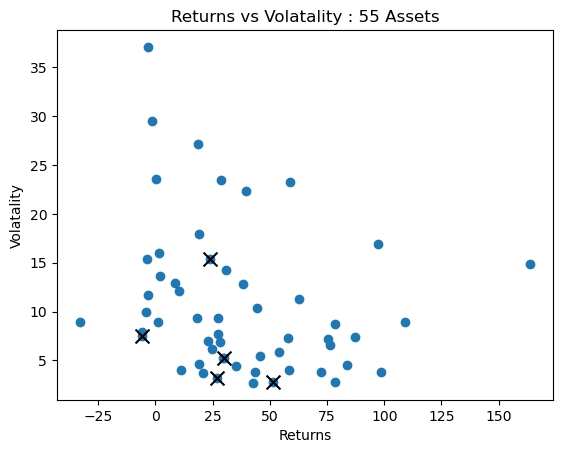

In [452]:
plt.scatter(returnDict.values(),volatalityDict.values())

markerList = initializeCentroids()[1]
print(markerList)
for i in markerList:
    plt.scatter(list(returnDict.values())[i],list(volatalityDict.values())[i],marker='x',s=100,c='black')
plt.xlabel("Returns")
plt.ylabel("Volatality")
plt.title("Returns vs Volatality : 55 Assets")

##### converting values from returns and volatality dictionary to 2d array using zip

In [453]:
RetVolArray = np.array(list(zip(list(returnDict.values()), list(volatalityDict.values()))))

##### Assign cluster will calculate the distance between all points and centroids and will assign the points closest to the centroid

In [454]:
def assignCluster(centroidList,dataList):
    assignPointDict = {}
    centroidLoc = centroidList
    for data in dataList:
        x1 = data[0];y1 = data[1]
        distanceDict = {}
        count = 0
        for centroid in centroidLoc:
            count = count+1
            x2 = centroid[0];y2 = centroid[1]
            distance = ((x2-x1)**2 + (y2-y1)**2)**(1/2)
            distanceDict[count] = distance
        temp = min(distanceDict.values())
        res = [key for key in distanceDict if distanceDict[key] == temp]
        if res[0] in assignPointDict:
            assignPointDict[res[0]].append([x1,y1])
        else:
            assignPointDict[res[0]] = []
            assignPointDict[res[0]].append([x1,y1])
    for key in list(assignPointDict.keys()):
        assignPointDict[key] = np.array(assignPointDict[key])
    return assignPointDict

In [455]:
centroidList = []
for i in markerList:
    centroidList.append(RetVolArray[i])

In [456]:
assignedPoints = assignCluster(centroidList,RetVolArray)

In [457]:
def plotKdata(dataList,markerList,assignedPoints):
    count = 0
    for key in list(assignedPoints.keys()):
        count = count+1
        new = assignedPoints[key]
        plt.scatter(new[:,0],new[:,1],label="Category {}".format(count))

    for i in markerList:
        plt.scatter(i[0],i[1],marker='x',s=100,c='black')
    plt.legend()
    plt.title('2D Dataset with Two Categories')

##### Plot the data as clusters generated from assigned cluster function

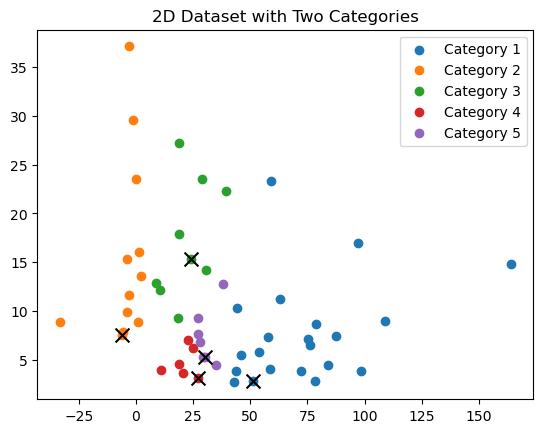

In [458]:
plotKdata(RetVolArray,centroidList,assignedPoints)

In [459]:
def update_centroids(assignedPoints):
    newCentroids = []
    for key in list(assignedPoints.keys()):
        nc = np.mean(assignedPoints[key], axis=0)
        newCentroids.append(nc)
    
    return newCentroids
newCentroids = update_centroids(assignedPoints)
assignedPoints = assignCluster(newCentroids,RetVolArray)

In [460]:
def KMeans(newCentroids,assignedPoints,dataList):
    oldCentroids = update_centroids(assignedPoints)
    assignedPoints = assignCluster(newCentroids,dataList)
    count = 0
    while(True):
        count = count+1
        newCentroids = update_centroids(assignedPoints)
        print(oldCentroids,newCentroids)
        y = all(np.array_equal(arr1, arr2) for arr1, arr2 in zip(oldCentroids, newCentroids)) #if old centroids and new centroids are true
        print(y)
        if(y):
            return [assignedPoints,newCentroids]
        else:
            oldCentroids = newCentroids
            assignedPoints = assignCluster(newCentroids,dataList)

In [461]:
output = KMeans(newCentroids,assignedPoints,RetVolArray)

[array([82.028625  ,  8.59769487]), array([-3.61776923, 15.61900993]), array([20.1522    , 19.22557956]), array([36.03766667,  7.77348351]), array([19.44316667,  5.79725433])] [array([82.028625  ,  8.59769487]), array([-3.61776923, 15.61900993]), array([20.1522    , 19.22557956]), array([36.03766667,  7.77348351]), array([19.44316667,  5.79725433])]
True


In [462]:
assignedPoints = output[0]
newCentroids = output[1]

Text(0.5, 1.0, 'Returns vs Volatality : 55 Assets')

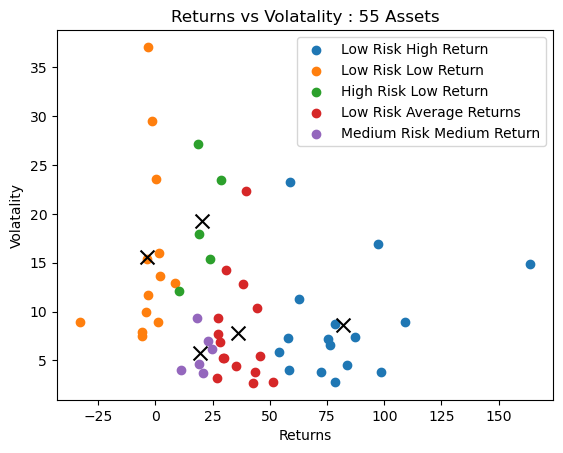

In [463]:
# plotKdata(RetVolArray,newCentroids,assignedPoints)
count = 0
for key,category in zip(list(assignedPoints.keys()),["Low Risk High Return","Low Risk Low Return","High Risk Low Return","Low Risk Average Returns","Medium Risk Medium Return"]):
    count = count+1
    new = assignedPoints[key]
    plt.scatter(new[:,0],new[:,1],label="{}".format(category))

for i in newCentroids:
    plt.scatter(i[0],i[1],marker='x',s=100,c='black')
plt.legend()
plt.xlabel("Returns")
plt.ylabel("Volatality")
plt.title("Returns vs Volatality : 55 Assets")

##### Now we have the assets distributed in 5 different categories based on the Risk & Return.

##### Create a dataframe which contains return volatality and cluster number

In [464]:
AssetDictRank = {"Asset":[],"Return":[],"Volatality":[],"ClusterNo":[]}
for i in list(assignedPoints.keys()):
    for j in assignedPoints[i]:
        for k in range(0,len(returnDict.keys())):
            if(list(returnDict.values())[k] == j[0]):
                AssetDictRank["Asset"].append(list(returnDict.keys())[k])
                AssetDictRank["Return"].append(j[0])
                AssetDictRank["Volatality"].append(j[1])
                AssetDictRank["ClusterNo"].append(i)
AssetDfRank = pd.DataFrame.from_dict(AssetDictRank)
print(AssetDfRank.head())

  Asset   Return  Volatality  ClusterNo
0   dia   87.240    7.444749          1
1   ivv   98.570    3.851242          1
2   iwm   62.871   11.274275          1
3   mdy  163.910   14.860667          1
4   qqq   78.344    2.831856          1


In [465]:
cluster_1_df = AssetDfRank[AssetDfRank['ClusterNo'] == 1].copy().reset_index(drop=True)
cluster_4_df = AssetDfRank[AssetDfRank['ClusterNo'] == 4].copy().reset_index(drop=True)
cluster_5_df = AssetDfRank[AssetDfRank['ClusterNo'] == 5].copy().reset_index(drop=True)

### PORTFOLIO STATISTICS

##### We will use Stocks,Gold,Bonds (SGB) to represent High,Medium,Low risk respectively

#### 1) Calculate daily returns and pct change of SGB

In [466]:
# Assuming you already have mask conditions for each asset
mask_stocks = (stocksDf['Date'] > "2001-01-01") & (stocksDf['Date'] <= "2022-01-01")
mask_bonds = (bondsDf['Date'] > "2001-01-01") & (bondsDf['Date'] <= "2022-01-01")
mask_gold = (goldDf['Date'] > "2001-01-01") & (goldDf['Date'] <= "2022-01-01")

# Filtering DataFrames based on masks
stocksDf = stocksDf.loc[mask_stocks]
stocksDf.reset_index(inplace=True)
bondsDf = bondsDf.loc[mask_bonds]
bondsDf.reset_index(inplace=True)
goldDf = goldDf.loc[mask_gold]
goldDf.reset_index(inplace=True)


In [467]:
SGB = pd.concat([stocksDf['Close'], goldDf['Close'], bondsDf['Close']], axis = 1)
SGB.columns = ['Stocks', 'Gold', 'Bonds']
SGB.head()

,Stocks,Gold,Bonds
0,2128.7800,270.0,4.752
1,2528.3799,269.3,4.923
2,2460.0400,268.4,4.808
3,2267.8501,269.0,4.672
4,2281.5400,269.0,4.601


In [468]:
SGB.pct_change(1).mean()

Stocks    0.000516
Gold      0.000424
Bonds     0.000357
dtype: float64

<Axes: >

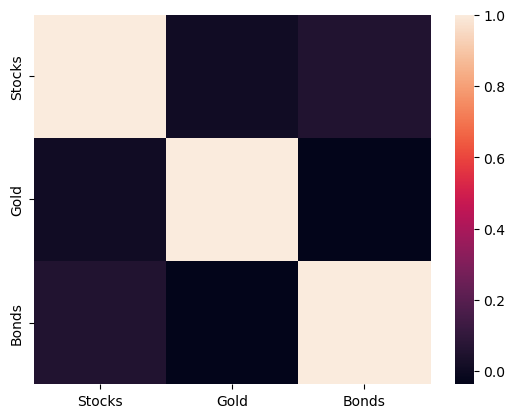

In [469]:
sns.heatmap(SGB.pct_change(1).corr())

##### As we can see the assets are very less correlated with each other.

#### 2) Calculating log return of assets for covariance

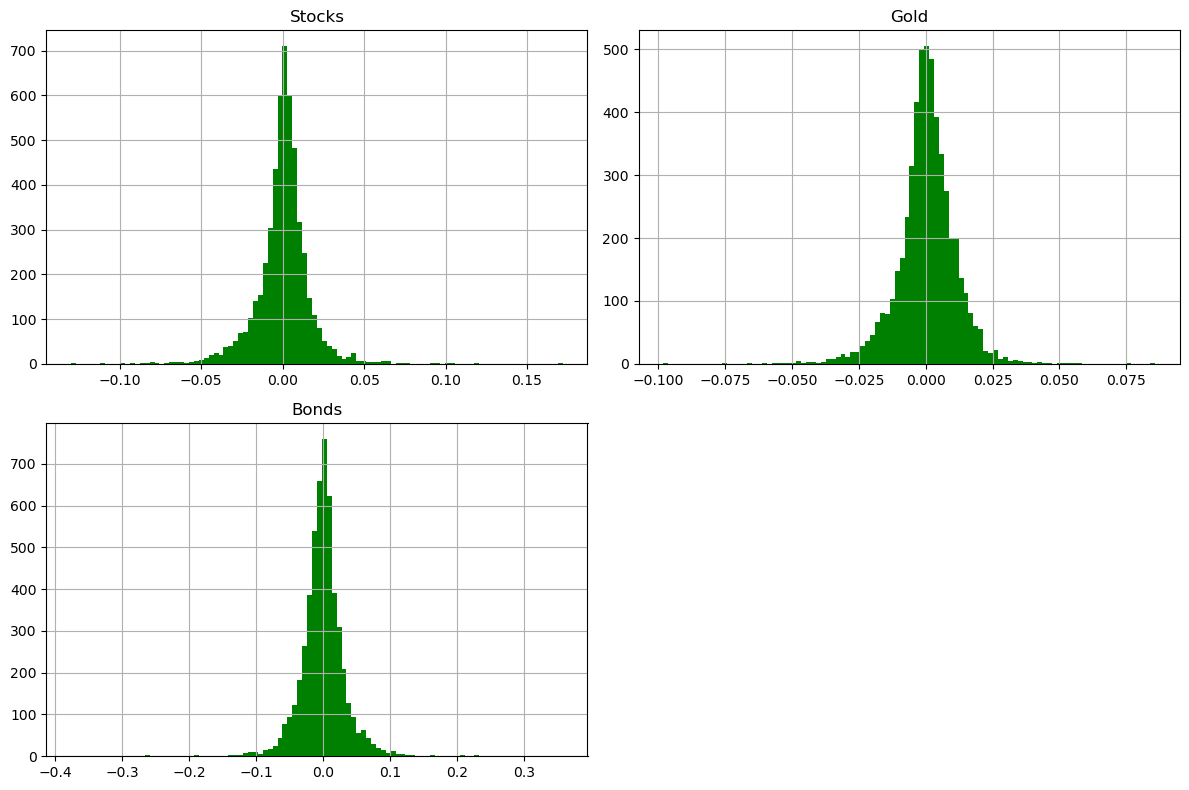

In [470]:
log_returns = np.log(SGB/SGB.shift(1))
log_returns.hist(bins = 100, figsize = (12,8), color = 'g')
plt.tight_layout()

#### 3) Calculate random weights for portfolio

In [471]:
np.random.seed()
print(SGB.columns)

weights = np.array(np.random.random(3))

print('Random Weights: ')
print(weights)

#However, their sum must be equal to 100
print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

Index(['Stocks', 'Gold', 'Bonds'], dtype='object')
Random Weights: 
[0.1855444  0.56134385 0.76535355]
Rebalance
[0.12269493 0.3711998  0.50610527]


#### 4) Calculate Sharpe ratio using expected returns and expected volatality.

In [472]:
exp_ret = np.sum((log_returns.mean() * weights) * 252)
print('Expected Portfolio Return: ',exp_ret)
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights)))
print('Expected Volatility: ', exp_vol)
SR = exp_ret/exp_vol
print('Sharpe Ratio: ', SR)

Expected Portfolio Return:  0.013752962047147724
Expected Volatility:  0.28892560789131544
Sharpe Ratio:  0.047600356879135296


##### Let’s see the Sharpe ratio interpretation:

In [473]:
print("Let’s see the Sharpe ratio interpretation")
print()
print("Sharpe ratio below 1 is a bad investment.\nSharpe ratio between 1 – 1.99 is a good investment.\nSharpe ratio between 2 – 2.99 is a great investment.\nSharpe ratio greater than 3 is an amazing investment.")

Let’s see the Sharpe ratio interpretation

Sharpe ratio below 1 is a bad investment.
Sharpe ratio between 1 – 1.99 is a good investment.
Sharpe ratio between 2 – 2.99 is a great investment.
Sharpe ratio greater than 3 is an amazing investment.


#### This 4 steps performed above will be used to build Efficient Fontier. Which is used to optimize the portfolio

### Decision Tree Implementation for stocks selection

#### 1) We will create data for decision tree.

##### We will use clusters that we created in above steps to calculate 

### Monte Carlo Simulation

In [474]:
num_ports = 10000                                       # Number of portfolios to generate
all_weights = np.zeros((num_ports,len(SGB.columns)))    # Arrays to store weights, returns, volatility, and Sharpe ratio for each portfolio
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)
SW = [];GW = [];BW = []

for ind in range(num_ports):
    weights = np.array(np.random.random(3))
    cluster_1_df
    x1 = random.randint(0,len(cluster_1_df)-1)          #Generate random number in the range of respective cluster
    x2 = random.randint(0,len(cluster_4_df)-1)
    x3 = random.randint(0,len(cluster_5_df)-1)
    lowRiskAsset = cluster_1_df.loc[x1]["Asset"]       
    midRiskAsset = cluster_4_df.loc[x2]["Asset"]
    highRiskAsset = cluster_5_df.loc[x3]["Asset"]
    # Extract closing prices for selected assets
    LMH =  pd.concat([dfDict[lowRiskAsset]['Close'], dfDict[midRiskAsset]['Close'], dfDict[highRiskAsset]['Close']], axis = 1)
    LMH.columns = [lowRiskAsset,midRiskAsset,highRiskAsset]
    log_returns = np.log(LMH/LMH.shift(1))              # Calculate log returns
    weights = weights / np.sum(weights)                 # Normalize weights to ensure they sum to 1
    # Store individual asset weights
    SW.append(weights[0])
    GW.append(weights[1])
    BW.append(weights[2])
    all_weights[ind,:] = weights
    ret_arr[ind] = np.sum((log_returns.mean() * weights) *252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]
finalDataset = pd.DataFrame()
# Store weights, returns, volatility, and Sharpe ratio for the portfolio
finalDataset["lowRiskAssetWeight"] = SW
finalDataset["midRiskAssetWeight"] = GW
finalDataset["highRiskAssetWeight"] = BW
finalDataset["Voltality"] = vol_arr
finalDataset["SharpeRatio"] = sharpe_arr
finalDataset["Returns"] = ret_arr

In [475]:
finalDataset.head()

,lowRiskAssetWeight,midRiskAssetWeight,highRiskAssetWeight,Voltality,SharpeRatio,Returns
0,0.340829,0.119758,0.539413,0.198073,0.334019,0.066160
1,0.217834,0.233259,0.548908,0.172250,0.620093,0.106811
2,0.352678,0.522132,0.125189,0.167285,0.484926,0.081121
3,0.450467,0.223494,0.326039,0.245509,0.297266,0.072982
4,0.033409,0.884544,0.082047,0.233704,0.279433,0.065305


##### Visualization of final data set.

Basic Statistics:


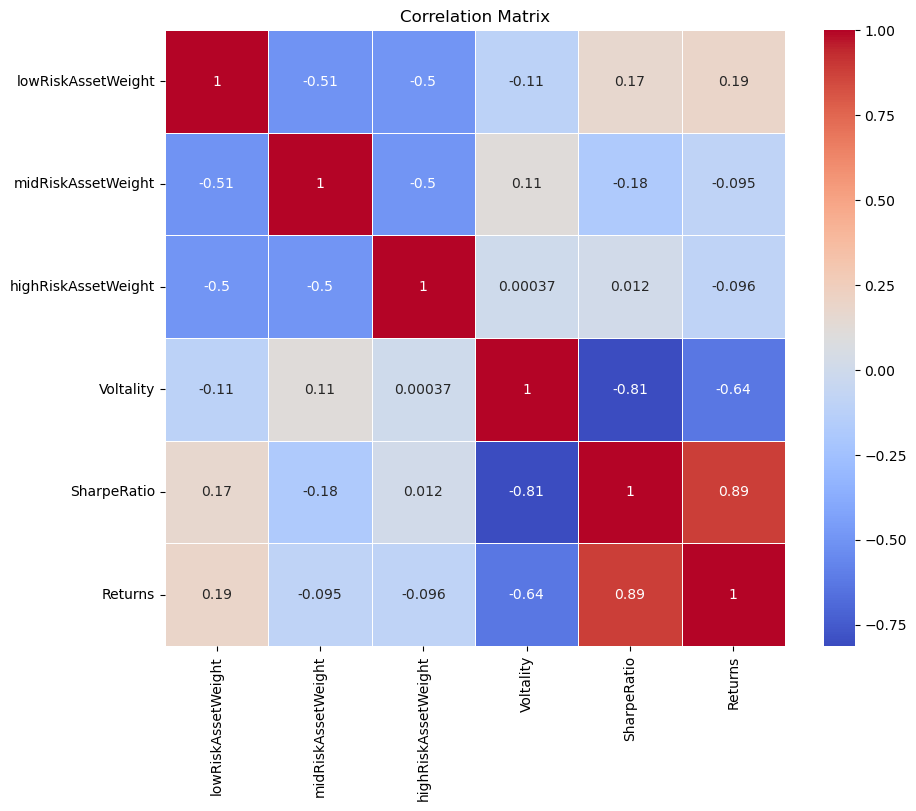

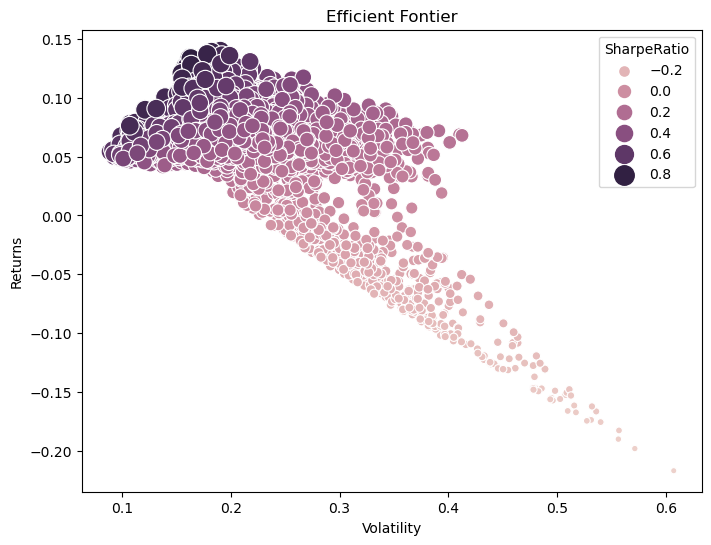

In [476]:
# Display basic statistics of the dataset
print("Basic Statistics:")
# print(finalDataset.describe())

correlation_matrix = finalDataset.corr()   # Correlation matrix

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Scatter plot of Returns vs Volatility
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Voltality', y='Returns', data=finalDataset, hue='SharpeRatio', size='SharpeRatio', sizes=(20, 200))
plt.title('Efficient Fontier')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()


##### Decision Trees are commonly used in machine learning for both classification and regression tasks. In this case, since we have numerical features and a numerical target variable (e.g., predicting Returns), we can use a Decision Tree for regression.

#### We are using decision tree for predicting returns based on the user input

Mean Squared Error: 2.0495484981350357e-06


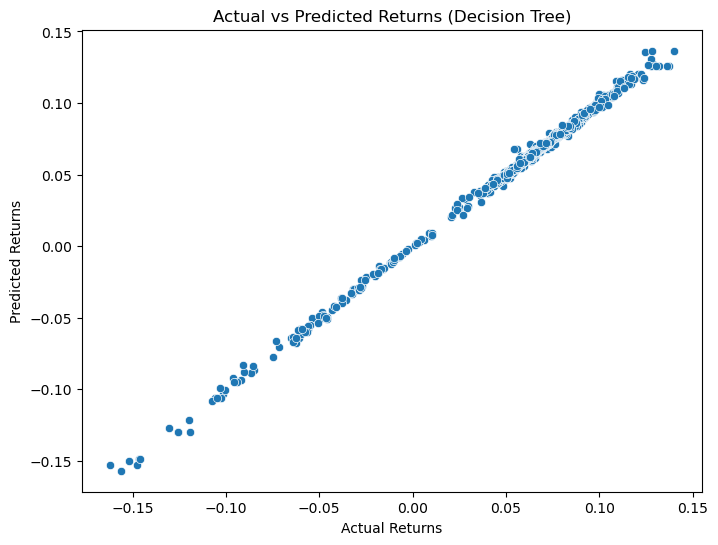

In [477]:
X = finalDataset[['lowRiskAssetWeight', 'midRiskAssetWeight', 'highRiskAssetWeight', 'Voltality', 'SharpeRatio']]
y = finalDataset['Returns']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = tree_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualization of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual Returns')
plt.ylabel('Predicted Returns')
plt.title('Actual vs Predicted Returns (Decision Tree)')
plt.show()

#### We will use linear regression to predict the sharpe ratio from the returns predicted in the decision tree

Text(0.5, 1.0, 'Sharpe Ratio vs Portfolio Returns')

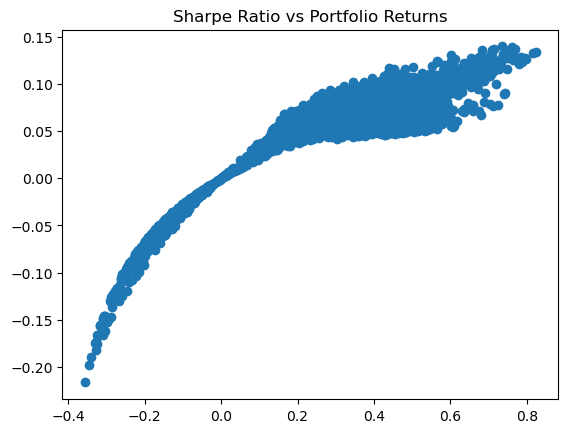

In [478]:
plt.scatter(finalDataset["SharpeRatio"],finalDataset["Returns"])
plt.title("Sharpe Ratio vs Portfolio Returns")

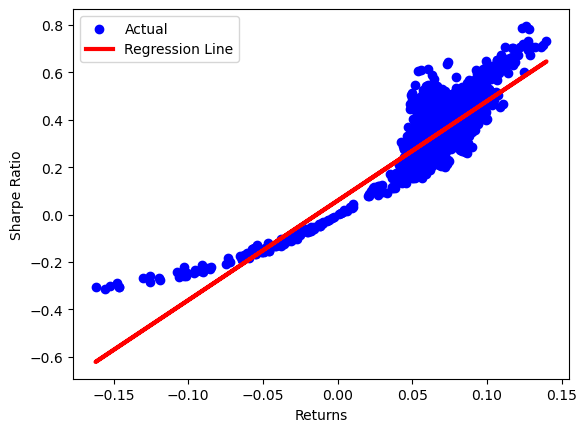

In [479]:
X = finalDataset[['Returns']]
y = finalDataset['SharpeRatio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Regression Line')
plt.xlabel('Returns')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.show()

#### Lets test the data with random user input

User Input are :

1)Total Risk (Volatility) 
    2)Expected Sharpe Ratio (Expected performance of the portfolio) 
    3)Weights of diversification

In [486]:
# Creating User input data

dummy_data = {
    'lowRiskAssetWeight': [0.1],
    'midRiskAssetWeight': [0.6],
    'highRiskAssetWeight': [0.3],
    'Voltality': [0.5],          #Expected Volatality
    'SharpeRatio': [1]           #Expected Sharpe Ratio
}

dummy_input = pd.DataFrame(dummy_data)

# Making predictions using the trained Decision Tree model
dummy_prediction = tree_regressor.predict(dummy_input)

print("\nPredicted Returns for User Input per year:")
print(dummy_prediction[0]*100)


Predicted Returns for User Input per year:
11.616443031155077


#### Now once we have predicted the reurns we can predict the sharpe ratio.

In [487]:
dummy_input = pd.DataFrame({'Returns': dummy_prediction})  # Example dummy input with a return of 0.1

# Make predictions using the trained model
predicted_sharpe_ratio = model.predict(dummy_input[['Returns']])

print("\nPredicted Sharpe Ratio:")
print(predicted_sharpe_ratio[0])


Predicted Sharpe Ratio:
0.5474556864281113
